# Digitalize Vespa VL3T "Struzzo" (1956) Instruction Manual

The original instruction manual, published in 1956, has no digital version that is available online, however, a scan of the instruction manual (in italian) was found for it.
In the following section the original manual will be converted to a digital version using OCR.
Later, the document will be split into chunks, to perform RAG.                                                                

In [1]:
import pytesseract
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Export pages as PNGs (from PDF)

In [2]:
# convert to image using resolution 600 dpi 
pages = convert_from_path("../pdf/U&M_Vespa_150_1956_VL2T.pdf", 600, fmt='png', grayscale=True)

for i,page in enumerate(pages):
    page.save(f"../imgs/vespa_manual_{i}.png","PNG")

 ## Tesseract OCR

In [3]:
# extract text
pages_text = []
for page in pages:
    text = pytesseract.image_to_string(page, lang='ita')
    pages_text.append(text)

Example, second page 2:

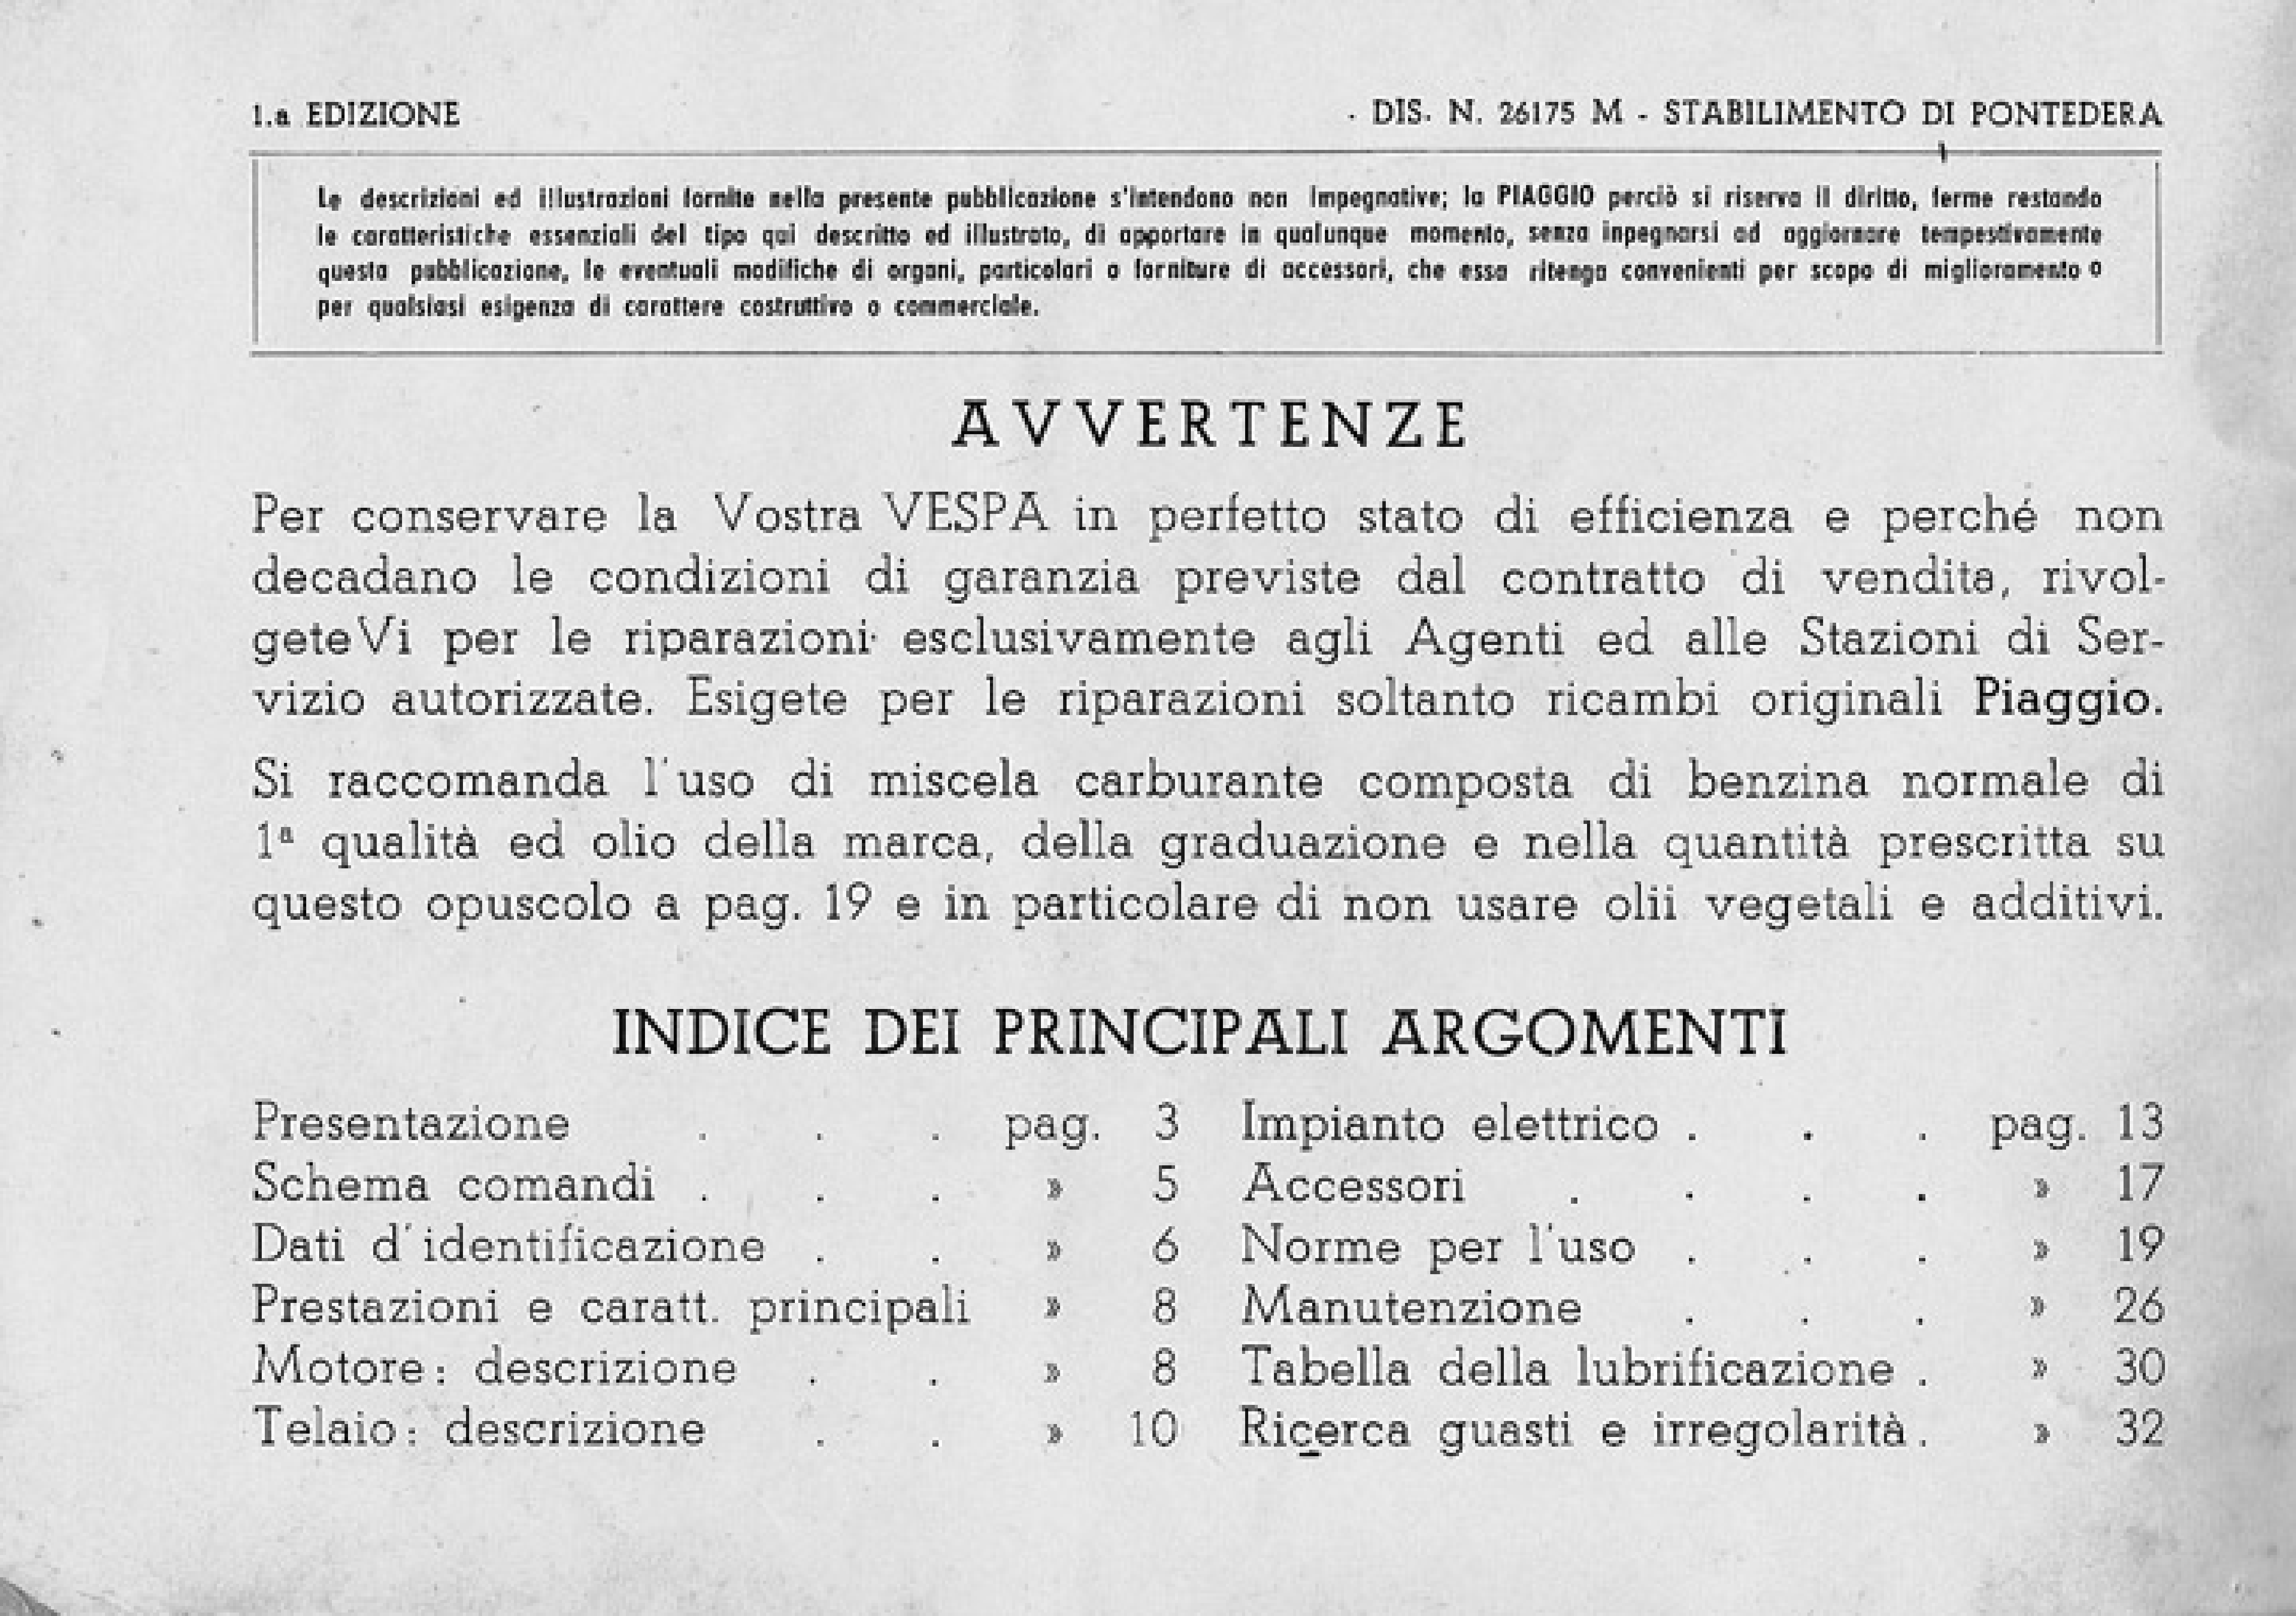

In [4]:
pages[1]

Tesseract OCR result:

In [5]:
print(pages_text[1])

1.8 EDIZIONE - DIS. N. 25175 M - STABILIMENTO DI PONTEDERA
È —r-

La descerizical ed illustrazioni lornlie nella presente pubblicazione s'letendono nen impegnative; lo PIAGGIO perciò si riserro Il dirinio, ferme resinndo
la corotieristiche essanzioli del tipo qui descritto ed illustrato, di opportore In qualunque momento, senzo inpagnorsi od aggiornare lempestiramente
quazio  pabblicozione, le eventuoli modiliche di ergoni, particolori o forniture di ocecessori, che essa ritengo convenienti per scopo di miglisramenio 0
per qualsiasi esigenza di corottere costruttiva 0 commerciale,

 

TIE O TI

 

AVVERTENZE

Per conservare la Vostra VESPA in perfetto stato di efficienza e perché non
decadano le condizioni di garanzia previste dal contratto di vendita, rivol-
geteVi per le riparazioni esclusivamente agli Agenti ed alle Stazioni di Ser-
vizio autorizzate. Esigete per le riparazioni soltanto ricambi originali Piaggio.

 

Si raccomanda luso di miscela carburante composta di benzina norma

### Pre-processing

Applying pre-processing techniques (filtering, binarization), looking for improvements

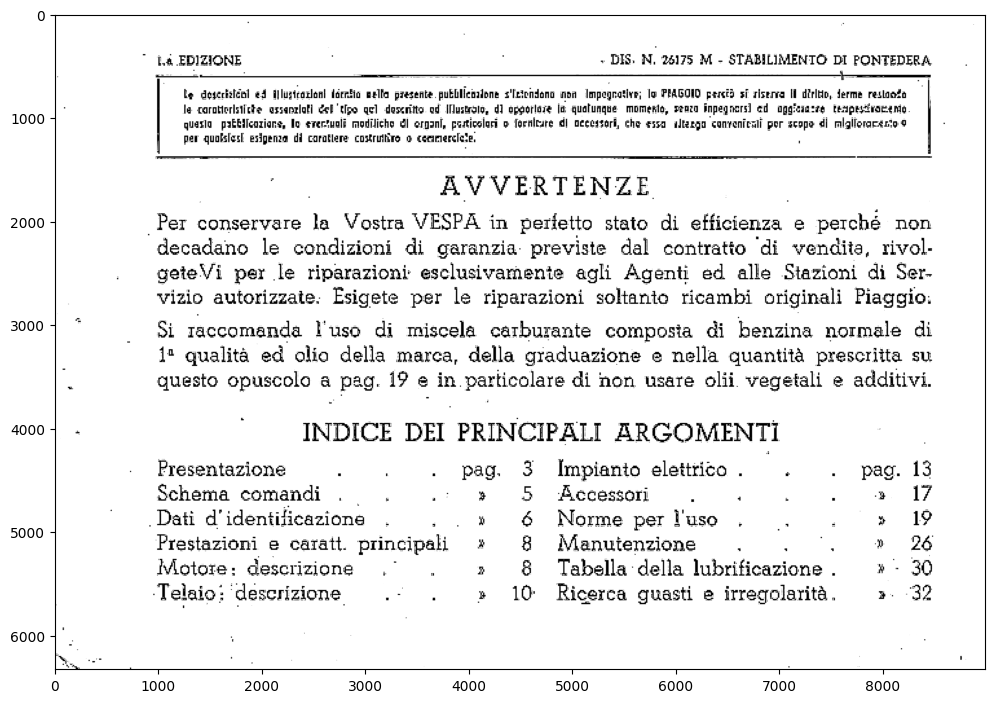

In [7]:
# resize image
resized_img = cv2.resize(np.array(pages[1]), None, fx=1.5, fy=1.5, interpolation=cv2.INTER_AREA)
# denoising
denoised_img = cv2.fastNlMeansDenoising(resized_img) 
# convert img to grayscale
gray_img = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
# binarize image
binary_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,81,15)
# display result
plt.figure(figsize=(12,12))
plt.imshow(binary_img, 'gray')
plt.show()

In [8]:
# extract text
text = pytesseract.image_to_string(binary_img, lang='ita')
print(text)

 

La EDIZIONE | « Dis IN, 25175 HI - STABILIMENTO DI PONTEDERA

La _—___ |———
Le degerksléal #3 illustenzioni dierfio sella presente. puEbilenalone s'ietendono non impegnative; lo PERGUID pesci sf risenna Il dirlbio, derma restonta |
la caroterlsticte asseniot Cel po gel duseritto. sl] Alustralo, di apgoriaze lù Tnt Momento, senza Inpegera cd 0ga: REIT tatiphss bare mo

per qualslesi esigenza P coratlere costruttire 1 cerimerclote:

AVVERTENZE

Per conservare la Vostra VESPA in perfetto stato di efficienza e perché non
decadano le condizioni di garanzia. previste dal contratto di vendita, rivol
geteVi per le riparazioni: esclusivamente agli Agenti ed alle Stazioni di Ser-
vizio autorizzate. Esigete per le riparazioni soltanto ricambi originali Piaggio.

Si raccomanda l'uso di miscela carburante composta di benzina normale di
1° qualità ed olio della marca, della graduazione e nella quantità prescritta su
questo opuscolo a pag. 19 e in. particolare di non usare olii vegetali e additivi

No evident improvement is obtained through preprocessing. Finetuning by labeling some of the pdf pages can be attempted, but is very time consuming. The problem is the inability to detect some dictionary words, which are instead interpreted as out-of-dictionary. We could fix this with edit distance, but then we should also reason on how to prefer domain-related dictionary (mechanical domain knowledge).

In [9]:
! systemctl start ollama
! ollama pull llava:7b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling 170370233dd5... 100% ▕████████████████▏ 4.1 GB                         
pulling 72d6f08a42f6... 100% ▕████████████████▏ 624 MB                         
pulling 43070e2d4e53... 100% ▕████████████████▏  11 KB                         
pulling c43332387573... 100% ▕████████████████▏   67 B                         
pulling ed11eda7790d... 100% ▕████████████████▏   30 B                         
pulling 7c658f9561e5... 100% ▕████████████████▏  564 B                         
verifying sha256 digest 
writing manifest 
success 


In [13]:
import ollama
res = ollama.chat(
	model="llava:7b",
	messages=[
		{
			'role': 'user',
			'content': 'Transcribe the content of the image',
			'images': ['../imgs/vespa_manual_1.png']
		}
	]
)

print(res['message']['content'])

ResponseError: model requires more system memory (4.9 GiB) than is available (3.9 GiB)

This result is deeply hallucinated